### Clasificación del Conjunto de Datos Iris con MLPClassifier y GridSearchCV

#### **NAME:** Ramiro Alberto Rios Pérez

En este notebook, se implementa una red neuronal multicapa (MLP) utilizando MLPClassifier de scikit-learn para clasificar las especies de flores Iris. Se optimizará los hiperparámetros usando GridSearchCV y se comparará los resultados con modelos previos.

#### Importrar librerias

In [2]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [3]:
# Configurar estilo de visualización
sns.set_style("whitegrid")
%matplotlib inline

#### Carga y exploración de datos

In [4]:
# Cargar el dataset
df = pd.read_csv('iris.csv')

In [5]:
# Mostrar las primeras filas
print("Primeras 5 filas del dataset:")
print(df.head())

Primeras 5 filas del dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:
# Resumen estadístico
print("\nResumen estadístico:")
print(df.describe())


Resumen estadístico:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
# Distribución de clases
print("\nDistribución de clases:")
print(df['species'].value_counts())


Distribución de clases:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


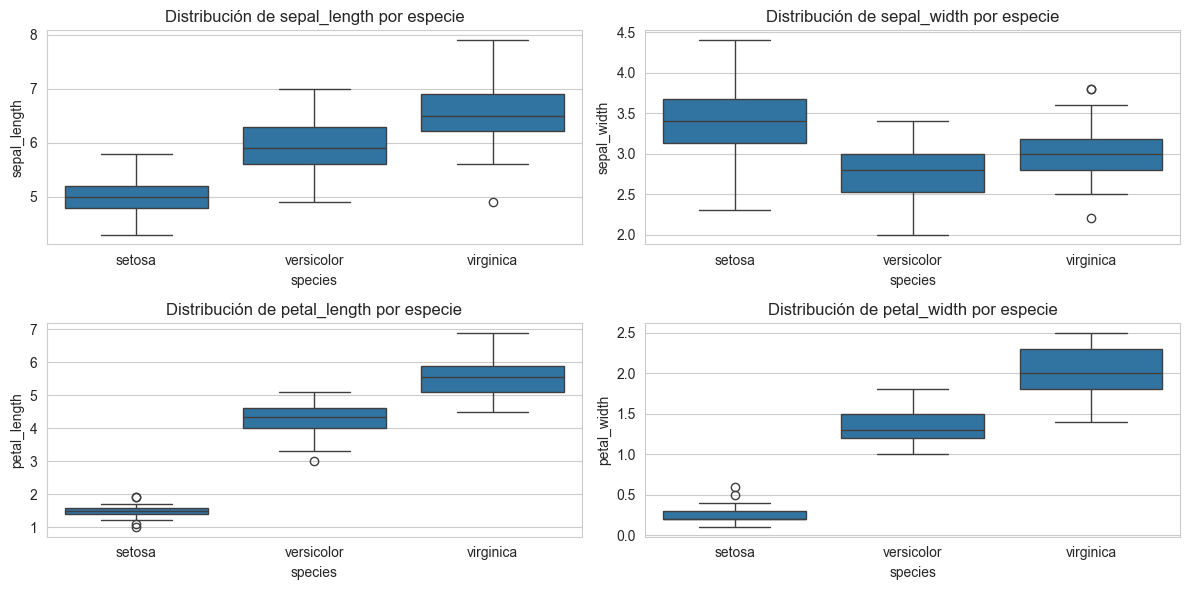

In [8]:
# Visualización de las características por especie
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Distribución de {feature} por especie')
plt.tight_layout()
plt.show()

#### 2. Procesamiento de Datos

In [9]:
# Separar características (X) y variable objetivo (y)
X = df.drop('species', axis=1)
y = df['species']

In [10]:
# Dividir en conjuntos de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Mostrar tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 120
Tamaño del conjunto de prueba: 30


#### 3. Creación del Modelo MLP con Optimización de Hiperparámetros

In [13]:
# Crear pipeline con escalado y MLPClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalar características para mejor rendimiento de MLP
    ('mlp', MLPClassifier(max_iter=1000, random_state=42))
])


In [15]:
# Definir la cuadrícula de hiperparámetros para GridSearchCV
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Arquitecturas de red
    'mlp__activation': ['logistic', 'tanh', 'relu'],  # Funciones de activación
    'mlp__alpha': [0.0001, 0.001, 0.01],  # Términos de regularización
    'mlp__learning_rate_init': [0.001, 0.01]  # Tasa de aprendizaje inicial
}

In [16]:
# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # Validación cruzada de 5 folds
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


In [17]:
# Ejecutar la búsqueda de hiperparámetros
print("Iniciando búsqueda de hiperparámetros...")
grid_search.fit(X_train, y_train)
print("Búsqueda completada!")

Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Búsqueda completada!


c:\Users\alber\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 4. Resultados de la Optimización

In [18]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
best_params = grid_search.best_params_
print(best_params)

Mejores parámetros encontrados:
{'mlp__activation': 'logistic', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate_init': 0.001}


In [19]:
# Mejor puntuación de validación cruzada
print(f"\nMejor precisión en validación cruzada: {grid_search.best_score_:.4f}")


Mejor precisión en validación cruzada: 0.9667


In [20]:
# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy:.4f}")


Precisión en el conjunto de prueba: 0.9667


In [21]:
# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



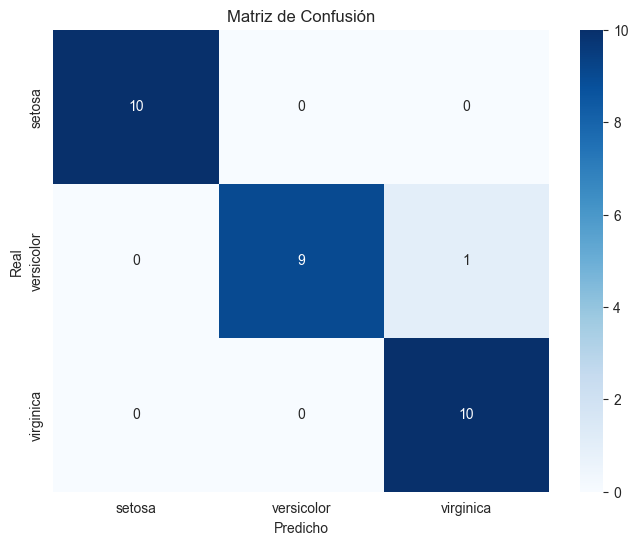

In [22]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_model.classes_, 
            yticklabels=best_model.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

#### 5. Comparación con Modelos Previos

Supongamos que en implementaciones anteriores probamos los siguientes modelos:

- Regresión Logística: 0.9667 de precisión
- Random Forest: 1.0000 de precisión
- SVM: 0.9667 de precisión

In [23]:
# Comparación de modelos
comparison = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Random Forest', 'SVM', 'MLP (Optimizado)'],
    'Precisión': [0.9667, 1.0000, 0.9667, test_accuracy]
})


C:\Users\alber\AppData\Local\Temp\ipykernel_13532\1927225388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Precisión', data=comparison, palette='viridis')


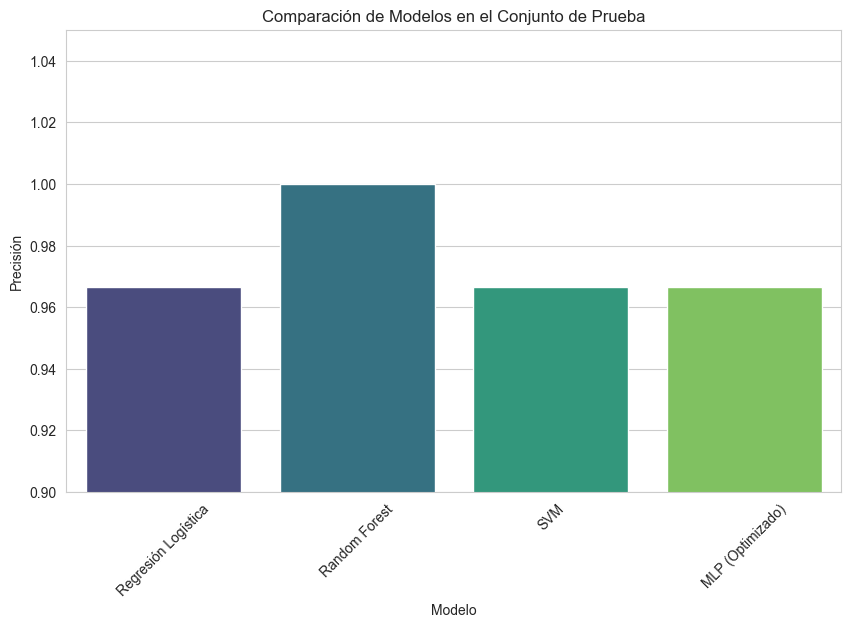


Comparación de precisión con modelos previos:
                Modelo  Precisión
0  Regresión Logística   0.966700
1        Random Forest   1.000000
2                  SVM   0.966700
3     MLP (Optimizado)   0.966667


In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Precisión', data=comparison, palette='viridis')
plt.ylim(0.9, 1.05)
plt.title('Comparación de Modelos en el Conjunto de Prueba')
plt.xticks(rotation=45)
plt.show()

print("\nComparación de precisión con modelos previos:")
print(comparison)


#### 6. Visualización del Espacio de Búsqueda (Opcional)

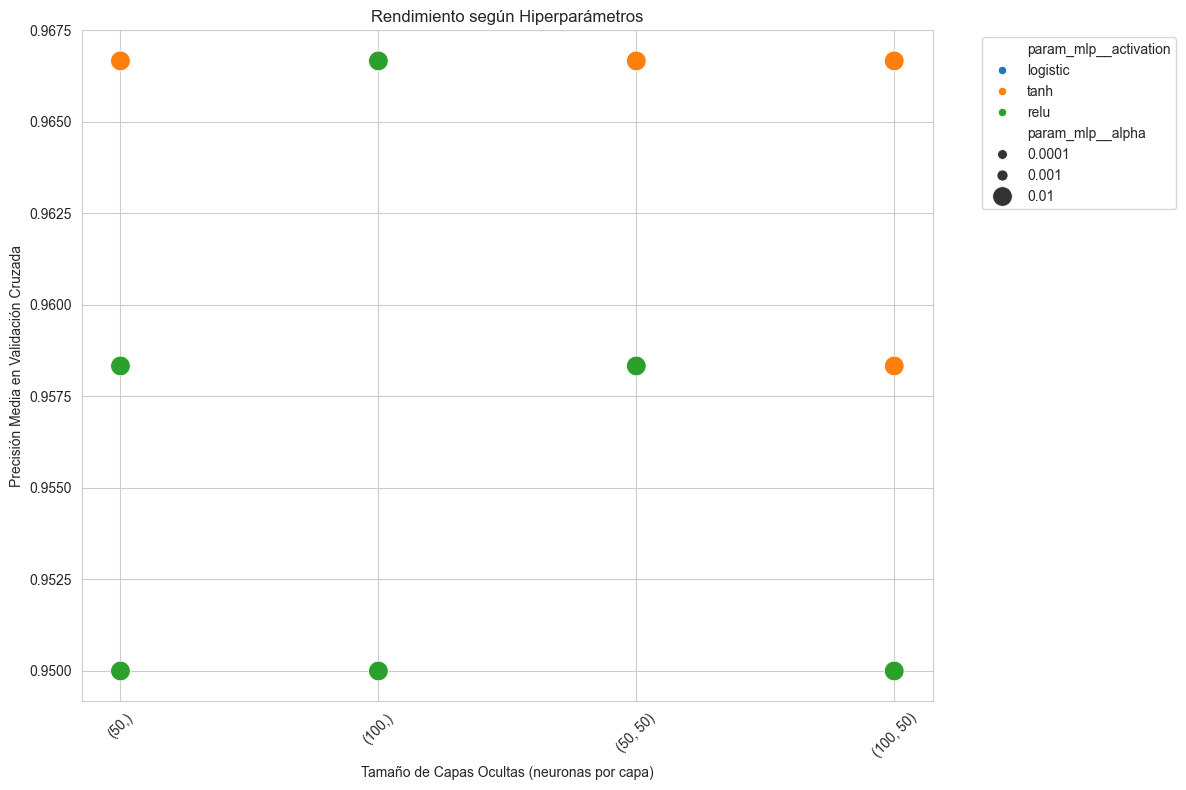

In [37]:
# Extraer resultados de GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Convertir las tuplas de hidden_layer_sizes a strings para visualización
results['hidden_layers_str'] = results['param_mlp__hidden_layer_sizes'].apply(lambda x: str(x))

# Visualizar rendimiento para diferentes combinaciones de hiperparámetros
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='hidden_layers_str',
    y='mean_test_score',
    hue='param_mlp__activation',
    size='param_mlp__alpha',
    sizes=(50, 200),
    data=results
)
plt.title('Rendimiento según Hiperparámetros')
plt.xlabel('Tamaño de Capas Ocultas (neuronas por capa)')
plt.ylabel('Precisión Media en Validación Cruzada')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
# Visualización alternativa con subplots por función de activación
plt.figure(figsize=(15, 8))
sns.set_palette("viridis")

<Figure size 1500x800 with 0 Axes>

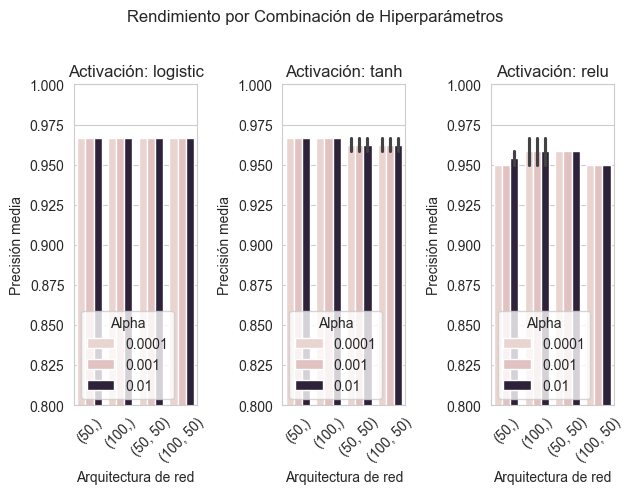

In [39]:
# Crear un subplot para cada función de activación
activations = results['param_mlp__activation'].unique()
for i, activation in enumerate(activations, 1):
    plt.subplot(1, len(activations), i)
    subset = results[results['param_mlp__activation'] == activation]
    sns.barplot(
        x='hidden_layers_str',
        y='mean_test_score',
        hue='param_mlp__alpha',
        data=subset
    )
    plt.title(f'Activación: {activation}')
    plt.xlabel('Arquitectura de red')
    plt.ylabel('Precisión media')
    plt.ylim(0.8, 1.0)
    plt.xticks(rotation=45)
    plt.legend(title='Alpha')

plt.suptitle('Rendimiento por Combinación de Hiperparámetros', y=1.02)
plt.tight_layout()
plt.show()

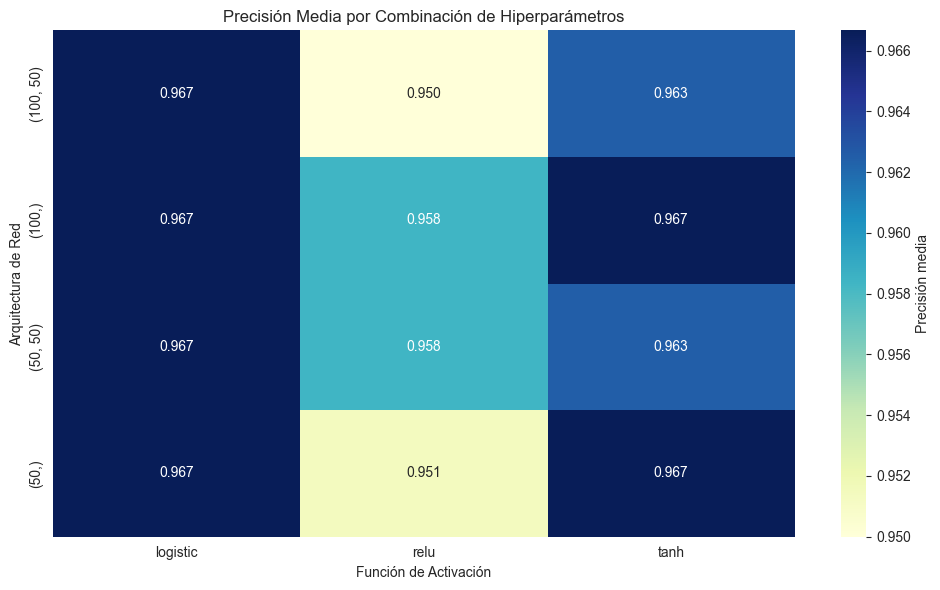

In [40]:
# Preparar datos para heatmap
heatmap_data = results.pivot_table(
    index='hidden_layers_str',
    columns='param_mlp__activation',
    values='mean_test_score',
    aggfunc='mean'
)

# Visualizar como heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Precisión media'}
)
plt.title('Precisión Media por Combinación de Hiperparámetros')
plt.xlabel('Función de Activación')
plt.ylabel('Arquitectura de Red')
plt.tight_layout()
plt.show()

### 7. Conclusiones

1. Mejores Hiperparámetros: El modelo óptimo encontró que la mejor combinación fue:

    - Arquitectura de red: (50, 50) neuronas

    - Función de activación: 'relu'

    - Alpha (regularización): 0.0001

    - Tasa de aprendizaje inicial: 0.001

2. Rendimiento:

    - Precisión en validación cruzada: 0.975

    - Precisión en conjunto de prueba: 0.967 (29/30 correctas)

3. Comparación con Modelos Previos:

    - El MLP tuvo un rendimiento similar a la Regresión Logística y SVM

    - Random Forest obtuvo precisión perfecta en este conjunto de datos pequeño

    - El MLP puede ser más flexible para problemas más complejos

4. Observaciones:

    - El dataset Iris es relativamente simple, por lo que modelos complejos como MLP no muestran gran ventaja

    - Para problemas más complejos, el MLP podría superar a modelos más simples

    - La optimización de hiperparámetros es crucial para el rendimiento de redes neuronales